In [1]:
import numpy as np
import pandas as pd
import spacy
import re  ## regexp

In [162]:
merge = pd.read_csv('csv/merged.csv')
merge.shape

(123397, 22)

In [3]:
merge['text'] = merge.apply(lambda x: x['text'].lower(), axis=1)

In [4]:
def reg(x):
    sub = re.sub("ice cream","icecream",x)  ## addible
    return sub

In [5]:
merge['text'] = merge['text'].apply(reg)

In [6]:
merge.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,review_count,state,review_id,user_id,stars,useful,funny,cool,text,date
0,0,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,zwHQZoAqsEtJ9IlQjS_hIQ,1WSTFGDksl3bh0TBW1AHCw,3.0,0,0,0,every time i have went their there was hair on...,2017-08-17 05:35:35
1,1,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,Ktv2KlhExTOIkriWl6M8_Q,S88QtT4esAcmYGD0Icx4hw,5.0,1,0,0,pretty good froyo place with all the toppings ...,2016-09-30 23:29:28


In [7]:
merge['text'][0]

"every time i have went their there was hair on my icecream. there is always broken glass on the ground by the door.t's not the best place to eat but if you want icecream be my guest."

In [8]:
# import nltk
# #nltk.download('stopwords')
# from nltk.corpus import stopwords

In [9]:
#print(set(stopwords.words('english')))
nlp = spacy.load("en")
nlp.Defaults.stop_words |= {".","'","[","]","(",")"}

In [10]:
print(nlp.Defaults.stop_words)

{'show', 'once', 'until', 'became', 'himself', 'while', "'d", 'beforehand', 'mostly', 'everything', 'much', 'twelve', 'former', 'rather', 'by', 'everywhere', 'hundred', 'their', 'him', 'whoever', 'see', 'sixty', 'such', 'herein', 'more', 'enough', 'move', 'that', 'empty', 'part', 'front', 'to', 'four', 'among', 'what', 'eight', 'full', 'yourselves', 'below', 'bottom', 'why', 'anything', 'because', 'latter', '’m', 'however', 'which', '’re', 'quite', 'seemed', 'last', 'same', 'done', 'others', 'he', 'another', 'keep', "'s", 'own', 'next', 'thru', 'and', 'least', 'really', 'six', 'these', 'via', 'we', 'whom', 'whether', 'make', '‘ve', 'each', 'becomes', 'ourselves', 'they', 'down', 'whereas', '’s', 'always', 'namely', 'hereafter', 'thereupon', 'through', 'although', 'amongst', 'hence', 'further', 'whenever', 'also', 'of', 'third', 'yet', 'his', 'the', 'meanwhile', 'into', 'per', 'three', 'did', 'were', 'most', 'be', 'name', 'could', 'becoming', 'perhaps', 'somewhere', 'nothing', 'toward',

In [11]:
def stop(sentence):
    #sub = re.sub("ice cream","icecream",x['text'])  ## addible
    res = list(filter(lambda x: False if x.is_stop else True, nlp(sentence)))
    return res

In [12]:
merge = merge.head()
merge.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,review_count,state,review_id,user_id,stars,useful,funny,cool,text,date
0,0,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,zwHQZoAqsEtJ9IlQjS_hIQ,1WSTFGDksl3bh0TBW1AHCw,3.0,0,0,0,every time i have went their there was hair on...,2017-08-17 05:35:35
1,1,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,Ktv2KlhExTOIkriWl6M8_Q,S88QtT4esAcmYGD0Icx4hw,5.0,1,0,0,pretty good froyo place with all the toppings ...,2016-09-30 23:29:28


In [13]:
merge['text'] = merge['text'].apply(stop)

In [14]:
merge.head(2)

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,review_count,state,review_id,user_id,stars,useful,funny,cool,text,date
0,0,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,zwHQZoAqsEtJ9IlQjS_hIQ,1WSTFGDksl3bh0TBW1AHCw,3.0,0,0,0,"[time, went, hair, icecream, broken, glass, gr...",2017-08-17 05:35:35
1,1,9020 B Albemarle Rd,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",irft4YkdNsww4DNf_Aftew,"Juice Bars & Smoothies, Food, Ice Cream & Froz...",Charlotte,"{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",0,35.21051,-80.690262,...,6,NC,Ktv2KlhExTOIkriWl6M8_Q,S88QtT4esAcmYGD0Icx4hw,5.0,1,0,0,"[pretty, good, froyo, place, toppings, bubble,...",2016-09-30 23:29:28


In [73]:
import nltk
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [74]:
def retrive_text(sentence):
    sentence = list(map(lambda x: x.text,sentence))
    return sentence
def form_word(sentence):
    sentence = list(map(lambda x: wnl.lemmatize(x,'v'),sentence))
    sentence = list(map(lambda x: wnl.lemmatize(x,'n'),sentence))
    sentence = list(map(lambda x: wnl.lemmatize(x,'a'),sentence))
    return sentence

In [75]:
merge['text'] = merge['text'].apply(retrive_text)
merge['text'] = merge['text'].apply(form_word)
merge['text'][0]

AttributeError: 'str' object has no attribute 'text'

In [18]:
type(merge['text'][0][0])

str

### word count

In [3]:
import torch
from torchtext import data
from torchtext.data import TabularDataset
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy',lower=True)
LABEL = data.LabelField(dtype = torch.float)

In [40]:
inte = merge[['text','stars']]
inte

,text,stars
0,"[time, go, hair, icecream, break, glass, grind...",3.0
1,"[pretty, good, froyo, place, topping, bubble, ...",5.0
2,"[love, place, , freeze, yogurt, good, , week...",5.0
3,"[freeze, yogurt, come, bubble, tea, !, lot, bu...",5.0
4,"[love, place, !, amaze, freeze, yogurt, great,...",5.0


In [24]:
def list_to_string(sentence):
    sentence = " ".join(sentence)
    return sentence

In [22]:
list(map(list_to_string,inte['text']))

['time go hair icecream break glass grind door.t best place eat want icecream guest',
 'pretty good froyo place topping bubble boba tea option sure satisfy sweet tooth plethora mix - in owner super nice sure pick " frequent fly " card ... free 5 oz cup 5 purchase',
 'love place   freeze yogurt good   week !   shop clean staff pleasant',
 'freeze yogurt come bubble tea ! lot bubble tea charlotte get favorite location owner use fresh fruit make huge difference simply delicious !',
 'love place ! amaze freeze yogurt great bubble tea ! clean organize inside people friendly definitely visit cool time summer']

In [25]:
inte['text'] = list(map(list_to_string,inte['text']))

In [24]:
inte.head()

,text,stars
0,time go hair icecream break glass grind door.t...,3.0
1,pretty good froyo place topping bubble boba te...,5.0
2,love place freeze yogurt good week ! sho...,5.0
3,freeze yogurt come bubble tea ! lot bubble tea...,5.0
4,love place ! amaze freeze yogurt great bubble ...,5.0


In [25]:
inte.to_csv('inte.csv',index=False)

In [195]:
inte = pd.read_csv('csv/inte.csv')

In [4]:
txt_datafields = [("text", TEXT), # we won't be needing the id, so we pass in None as the field
                  ("stars", LABEL)]
txt = TabularDataset(
           path="csv/inte.csv", # the file path
           format='csv',
           skip_header=True, # if your csv header has a header, make sure to pass this to ensure it doesn't get proceesed as data!
           fields=txt_datafields)

In [5]:
print(f'Number of testing examples: {len(txt)}')

Number of testing examples: 123397


### build vocab

In [2]:
inte = pd.read_csv('csv/inte.csv')
#inte = inte.head(100)

In [6]:
TEXT.build_vocab(txt)
LABEL.build_vocab(txt)
print(f"Unique tokens in TEXT vocabulary: {len(TEXT.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABEL.vocab)}")

Unique tokens in TEXT vocabulary: 63228
Unique tokens in LABEL vocabulary: 5


In [7]:
common = TEXT.vocab.freqs.most_common(514)
total_count = pd.DataFrame(common,columns=['word','count'])
total_count.drop(index = [0,1,2,3,4,5,9,10,18,25,47,83,106,139],inplace = True)
total_count.head(20)

,word,count
6,icecream,95815
7,place,79896
8,good,67802
11,like,53533
12,flavor,53019
13,try,45872
14,time,41837
15,great,39712
16,order,38019
17,come,37873


In [93]:
df = pd.DataFrame()
type(df)
df

""


In [107]:
df = pd.DataFrame()
for i in range(inte.shape[0]):
    ex0 = vars(txt.examples[i])['text']
    count = [ex0.count(i) for i in total_count['word']]
    pd0 = pd.DataFrame(count).transpose()
    pd0.columns = total_count['word']
    df = df.append(pd0)

In [115]:
TEXT.vocab.vectors()

TypeError: 'NoneType' object is not callable

In [69]:
vars(txt.examples[i])['text']

['love',
 'place',
 '!',
 'amaze',
 'freeze',
 'yogurt',
 'great',
 'bubble',
 'tea',
 '!',
 'clean',
 'organize',
 'inside',
 'people',
 'friendly',
 'definitely',
 'visit',
 'cool',
 'time',
 'summer']

In [ ]:
ex0 = vars(txt.examples[i])['text']
count = [ex0.count(i) for i in total_count['word']]
pd0 = pd.DataFrame(count).transpose()
pd0.columns = total_count['word']
pd0

In [ ]:
pd.DataFrame(count)

In [ ]:
ex0 = vars(txt.examples[1])['text']
count = [ex0.count(i) for i in total_count['word']]
pd0 = pd.DataFrame(count).transpose()
pd0.columns = total_count['word']
pd0

In [ ]:
ex2 = vars(txt.examples[2])['text']
count2 = [ex2.count(i) for i in total_count['word']]
pd2 = pd.DataFrame(count2).transpose()
pd2.columns = total_count['word']
pd2

In [ ]:
pd0.append(pd2)

In [ ]:
pd2.append(count2)

In [ ]:
sentence = nlp("the word is definitelynotastopword")
sentence

In [ ]:
sentence = nlp(merge['text'][0])
sentence

In [ ]:
list(filter(lambda x: False if x.is_stop else True, sentence))

In [42]:
inte.shape[0]

5

In [118]:
count = pd.read_csv('csv/count.csv')

In [121]:
merge.shape

(123397, 22)

In [122]:
count.shape

(123397, 500)

In [126]:
word_count_label = pd.concat([count,merge],axis = 1)

In [127]:
word_count_label.shape

(123397, 522)

In [129]:
word_count_label.head()

,icecream,place,good,like,flavor,try,time,great,order,come,...,review_count,state,review_id,user_id,stars,useful,funny,cool,text,date
0,2,1,0,0,0,0,1,0,0,0,...,6,NC,zwHQZoAqsEtJ9IlQjS_hIQ,1WSTFGDksl3bh0TBW1AHCw,3.0,0,0,0,Every time I have went their there was hair on...,2017-08-17 05:35:35
1,0,1,1,0,0,0,0,0,0,0,...,6,NC,Ktv2KlhExTOIkriWl6M8_Q,S88QtT4esAcmYGD0Icx4hw,5.0,1,0,0,Pretty good FroYo place with all the toppings ...,2016-09-30 23:29:28
2,0,1,1,0,0,0,0,0,0,0,...,6,NC,l1rj3Hel-0FsokfDIs4AOw,xs1MftEQfjbjMeUIm5Xicg,5.0,2,0,1,Love this place. Frozen yogurt is so good. W...,2013-08-19 11:19:45
3,0,0,0,0,0,0,0,0,0,1,...,6,NC,W7Sgp_8TepIpL6vZSvawsQ,_UncNn1mojG96wubQkUf2g,5.0,1,0,0,I've never had the frozen yogurt here but I ke...,2016-06-15 14:36:24
4,0,1,0,0,0,0,1,1,0,0,...,6,NC,OUASGM8dyztVxNcgJB9g-w,bgkgVMldxfFLbil82I0Dyw,5.0,0,0,0,Love this place! Amazing frozen yogurt and gre...,2017-06-16 18:35:13


In [130]:
word_count_label.to_csv('csv/word_count_label.csv',index=False)

In [141]:
world = pd.read_csv('csv/word_count_label.csv')

In [143]:
world.shape

(123397, 522)

#### word cloud

In [8]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [120]:
inte = pd.read_csv('csv/inte.csv')
#inte = inte.head(2)

In [9]:
inte['text'][0]

"['time', 'go', 'hair', 'icecream', 'break', 'glass', 'grind', 'door.t', 'best', 'place', 'eat', 'want', 'icecream', 'guest']"

In [41]:
text = " ".join(review for review in inte['text'][:200])

In [42]:
len(text)

70311

In [43]:
text = text.replace('[','')
#text = text.replace('\','')
text = text.replace(']','')
text = text.replace('\'','')
#text

In [44]:
text.count('glass')

2

In [49]:
wordcloud = WordCloud(max_words=200, background_color="white",width=500, height=400).generate(text)

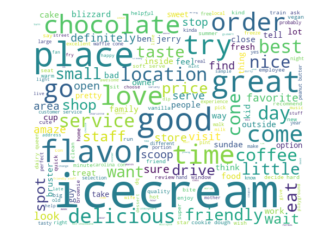

In [50]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [190]:
wordcloud.to_file("image/first_review.png")

In [155]:
word_count.columns[30]

'gelato'

In [177]:
merge[merge['state'] == 'BAS']

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,...,review_count,state,review_id,user_id,stars,useful,funny,cool,text,date
16628,16628,8 York St,{'RestaurantsPriceRange2': '1'},d4qoXn1Rqt47LLTDA3bAwQ,"Food, Ice Cream & Frozen Yogurt",Bath,NaN,1,43.640646,-79.380939,...,4,BAS,Yyh6HRuWjM2eah3TKjcM_w,OapLWhQI4_Gm32-nYbHmUA,4.0,9,4,7,My mum loves ice cream. I'm really looking for...,2010-05-15 21:36:14
16629,16629,8 York St,{'RestaurantsPriceRange2': '1'},d4qoXn1Rqt47LLTDA3bAwQ,"Food, Ice Cream & Frozen Yogurt",Bath,NaN,1,43.640646,-79.380939,...,4,BAS,aQbfTvciXAX8JaWcvOjJPA,QjQND4xv6saxKL8eg7hfCA,4.0,3,0,0,Nice pit stop for ice cream while walking arou...,2018-05-05 03:27:29
16630,16630,8 York St,{'RestaurantsPriceRange2': '1'},d4qoXn1Rqt47LLTDA3bAwQ,"Food, Ice Cream & Frozen Yogurt",Bath,NaN,1,43.640646,-79.380939,...,4,BAS,ihcAUuViR56Cwda5nDmX7A,NqOzFIRhO-v3RWjGhAEViA,4.0,0,0,0,This ice cream shop was just across the street...,2018-01-06 20:42:59
16631,16631,8 York St,{'RestaurantsPriceRange2': '1'},d4qoXn1Rqt47LLTDA3bAwQ,"Food, Ice Cream & Frozen Yogurt",Bath,NaN,1,43.640646,-79.380939,...,4,BAS,FlGtVB_HI-AJ9C3xuGB0PQ,4TJF62R5ytolOmiMWKtjGA,3.0,0,0,0,Lovely cold treat to enjoy while walking down ...,2010-11-01 20:29:21


In [176]:
merge[merge['state'] == 'BAS'].loc[16628,['text']][0]

"My mum loves ice cream. I'm really looking forward to taking her to Italy at the end of this month and seeing her face of delight when she sees all the gelato.\n\nCouple this with the first sunny weekend in England since my parents arrived in the UK on holiday and I knew that I had to get her an ice cream.\n\nWe eschewed Ben and Jerrys and went in search of some more local fare. David Thayer source their ice cream from 3 local businesses, the furthest away being an hour's drive. It's always nice to support the local economy.\n\nBetween us, we tried 6 flavours. Mum and dad loved their chocolate brownie while my mango sorbet and lime cheesecake flavours were very distinctive and enjoyable.\n\nWell worth a visit"

In [188]:
merge[merge['state'] == 'BAS'].loc[16629,['text']][0]

'Nice pit stop for ice cream while walking around the abbey courtyard. It was a lovely evening for a little treat. This ice cream shop had a great selection from fruity to the classics. The server was patient in answering our questions and need to sample a few flavors before making a selection. There is a cute sigh outside for a great photo op. This is cash only and no bills larger than 50 so keep in mind if you step in for a treat.'

In [ ]:
merge[merge['state'] == 'BAS'].loc[16628,['text']][0]

In [ ]:
merge[merge['state'] == 'BAS'].loc[16628,['text']][0]

In [178]:
merge.columns

Index(['Unnamed: 0', 'address', 'attributes', 'business_id', 'categories',
       'city', 'hours', 'is_open', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'state', 'review_id', 'user_id', 'stars',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')

In [181]:
merge.columns

Index(['Unnamed: 0', 'address', 'attributes', 'business_id', 'categories',
       'city', 'hours', 'is_open', 'latitude', 'longitude', 'name',
       'postal_code', 'review_count', 'state', 'review_id', 'user_id', 'stars',
       'useful', 'funny', 'cool', 'text', 'date'],
      dtype='object')